In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
                      'punkt',
                      'wordnet',
                      'omw-1.4',
                      'vader_lexicon'
                      ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [7]:
#APPLICATION OF TEXT MINING AND SENTIMENT ANALYSIS ON PATONG REVIEWS DATASET
#Reviews from 30 hotels in Patong region of Thailand dataset and exploration
Pat = pd.read_csv('Patong_reviews.csv')
Pat.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
1,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
2,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
3,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
4,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...


In [8]:
#Exploration
Pat.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,16403,16403,16403,16403,16403
unique,15112,1786,1,164,15111
top,rn292481886,Reviewed 1 week ago,Patong,No.6 Restaurant,The girls working (?) here seemed more interes...
freq,10,226,16403,200,10


In [9]:
Pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16403 entries, 0 to 16402
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     16403 non-null  object
 1   Review Date            16403 non-null  object
 2   Location               16403 non-null  object
 3   Hotel/Restaurant name  16403 non-null  object
 4   Review                 16403 non-null  object
dtypes: object(5)
memory usage: 640.9+ KB


In [10]:
#The columns not needed were dropped
Pat.drop(columns=['ID', 'Review Date', 'Location'],inplace=True)

In [11]:
#checking of stopwords from tokenized text available
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
#a function was created for preprocessing
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)#Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]#Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]#Stemming
  return stemmed_text

In [13]:
Pat['Hotel/Restaurant name'].value_counts()

No.6 Restaurant                                      200
Da Mario                                             187
Spoon Cafe                                           100
99 Seafood                                           100
Baan Rim Pa Patong                                   100
                                                    ... 
Ristorante Pizzeria Zafferano                         92
Austrian Garden Restaurant                            92
La Capannina da Mario                                 91
Sultan's Grill Authentic Turkish & Indian Cuisine     91
Chez Nicolas                                          90
Name: Hotel/Restaurant name, Length: 164, dtype: int64

In [14]:
# checking class imbalance
print("\n All Data Labels")
#shows class imbalance
print(Pat.groupby("Hotel/Restaurant name").count())


 All Data Labels
                                  Review
Hotel/Restaurant name                   
3 Spices Restaurant                  100
99 Seafood                           100
Acqua Restaurant                     100
Ali Baba Restaurant                  100
Ao Chalong Yacht Club Restaurant     100
...                                  ...
Wok                                  100
YamThai Restaurant                   100
Yo Green Restaurant                  100
You and Me Patong                    100
i-Kroon Cafe                         100

[164 rows x 1 columns]


In [15]:
#Preprocessing of text
Pat['Review'] = Pat['Review'].apply(preprocess_text)
Pat.head()

,Hotel/Restaurant name,Review
0,Sam's Steaks and Grill,"[expens, comparison, local, restaur, that', ap..."
1,Sam's Steaks and Grill,"[walk, pass, holiday, inn, decid, last, minut,..."
2,Sam's Steaks and Grill,"[atmospher, 70', great, comfort, armchair, eff..."
3,Sam's Steaks and Grill,"[made, reserv, last, minut, dine, sam, stay, h..."
4,Sam's Steaks and Grill,"[great, time, celebr, son, birthday, trip, phu..."


In [16]:
#application of vectorization on the dataset text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Pat['Review'].map(' '.join))
X = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
X.head()

,00,000,0080,0081,0082,0083,0084,0085,0087,0089,...,zero,zim,zinger,zip,zjesz,zona,zone,zucchin,zucchini,zwiebelrostbraten
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Training of the dataset
from sklearn.model_selection import train_test_split
y = Pat['Hotel/Restaurant name']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,train_size=0.8,test_size=0.2,random_state=99)

<AxesSubplot:xlabel='Hotel/Restaurant name', ylabel='count'>

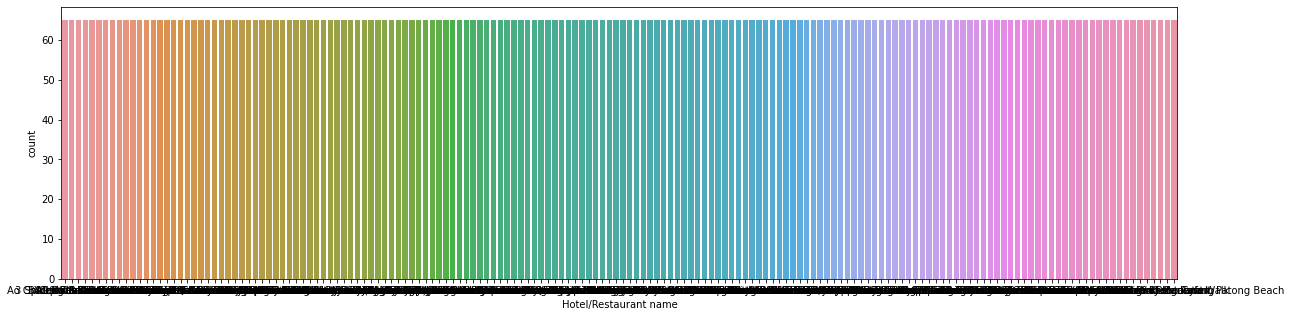

In [18]:
#exploration
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=5)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train,y_train)
plt.figure(figsize=(20,5))
sns.countplot(x=y_train_undersampled)

In [19]:
#Model fitting using multinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_undersampled,y_train_undersampled)

MultinomialNB()

In [20]:
y_pred = model.predict(X_test)
#Summarizing results from the model and visualizing it
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n' %(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('--------------------------------')
result = metrics.classification_report(y_test,y_pred)
print("Classification Report:\n",)
print(result)

accuracy:0.33


Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 1  0  4 ...  0  1  0]
 ...
 [ 0  0  0 ... 13  1  1]
 [ 0  1  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]] 


--------------------------------
Classification Report:

                                                          precision    recall  f1-score   support

                                     3 Spices Restaurant       0.00      0.00      0.00        17
                                              99 Seafood       0.18      0.20      0.19        10
                                        Acqua Restaurant       0.31      0.18      0.23        22
                                     Ali Baba Restaurant       0.39      0.29      0.33        24
                        Ao Chalong Yacht Club Restaurant       0.27      0.41      0.33        17
                                       Arabia Restaurant       0.36      0.17      0.23        29
                              Austrian Garden Restaurant       

In [21]:
#APPLICATION OF SENTIMENT ANALYSIS ON THE PATONG DATASET
#Reviews and exploration
Pat1 = pd.read_csv('Patong_reviews.csv')
Pat1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
1,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
2,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
3,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
4,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...


In [22]:
#extracting the values from the dictionary to create additional columns
Pat1['compound']=[sentiment.polarity_scores(review)['compound'] for review in Pat1['Review']]
Pat1['neg']=[sentiment.polarity_scores(review)['neg'] for review in Pat1['Review']]
Pat1['neu']=[sentiment.polarity_scores(review)['neg'] for review in Pat1['Review']]
Pat1['pos']=[sentiment.polarity_scores(review)['pos'] for review in Pat1['Review']]
Pat1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,0.8674,0.0,0.0,0.179
1,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,0.4939,0.0,0.0,0.097
2,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",0.9839,0.0,0.0,0.457
3,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,0.9626,0.0,0.0,0.325
4,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,0.9258,0.0,0.0,0.316


In [23]:
#statistical review of the negative, neutral and positive words
Pat1[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,16403.000000,16403.000000,16403.000000,16403.000000
mean,0.644311,0.028129,0.028129,0.232051
std,0.436186,0.052804,0.052804,0.137204
min,-0.970400,0.000000,0.000000,0.000000
25%,0.557400,0.000000,0.000000,0.129000
50%,0.836000,0.000000,0.000000,0.225000
75%,0.923900,0.044000,0.044000,0.325000
max,0.993000,0.497000,0.497000,0.783000


<AxesSubplot:xlabel='compound', ylabel='Count'>

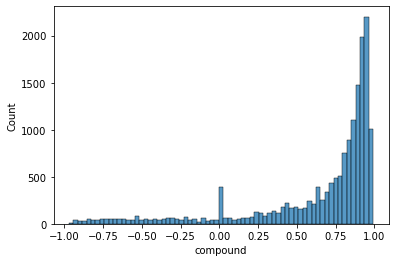

In [24]:
#VISUALIZING THE COMPOUND TOKENS
sns.histplot(Pat1['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

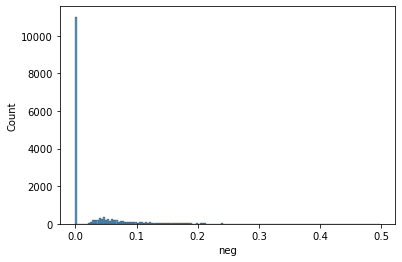

In [25]:
#VISUALIZING THE NEGATIVE TOKENS
sns.histplot(Pat1['neg'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

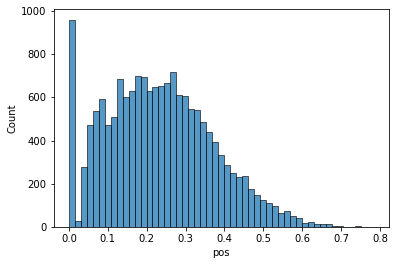

In [26]:
#VISUALIZING THE POSITIVE TOKENS
sns.histplot(Pat1['pos'])

In [27]:
#exploring the negative reviews for each hotel in Patong 
(Pat1['compound']<=0).groupby(Pat1['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
3 Spices Restaurant                  6
99 Seafood                          23
Acqua Restaurant                     6
Ali Baba Restaurant                 37
Ao Chalong Yacht Club Restaurant     2
                                    ..
Wok                                 11
YamThai Restaurant                  10
Yo Green Restaurant                 11
You and Me Patong                   10
i-Kroon Cafe                         5
Name: compound, Length: 164, dtype: int64

In [28]:
#calculating in percentage the output of total negative reviews
percent_negative = pd.DataFrame((Pat1['compound']<=0).groupby(Pat1['Hotel/Restaurant name']).sum()
                            /Pat1['Hotel/Restaurant name'].groupby(Pat1['Hotel/Restaurant name']).count()*100,
                  columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel/Restaurant name,
Golbasi,0.000000
Sam's Steaks and Grill,1.000000
Ao Chalong Yacht Club Restaurant,2.000000
Sultan's Grill Authentic Turkish & Indian Cuisine,2.197802
Highway Curry Indian & Thai Cuisine,3.000000
...,...
Kazu Patong Phuket,30.434783
Chez Nicolas,33.333333
Food Market Restaurant,34.343434


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

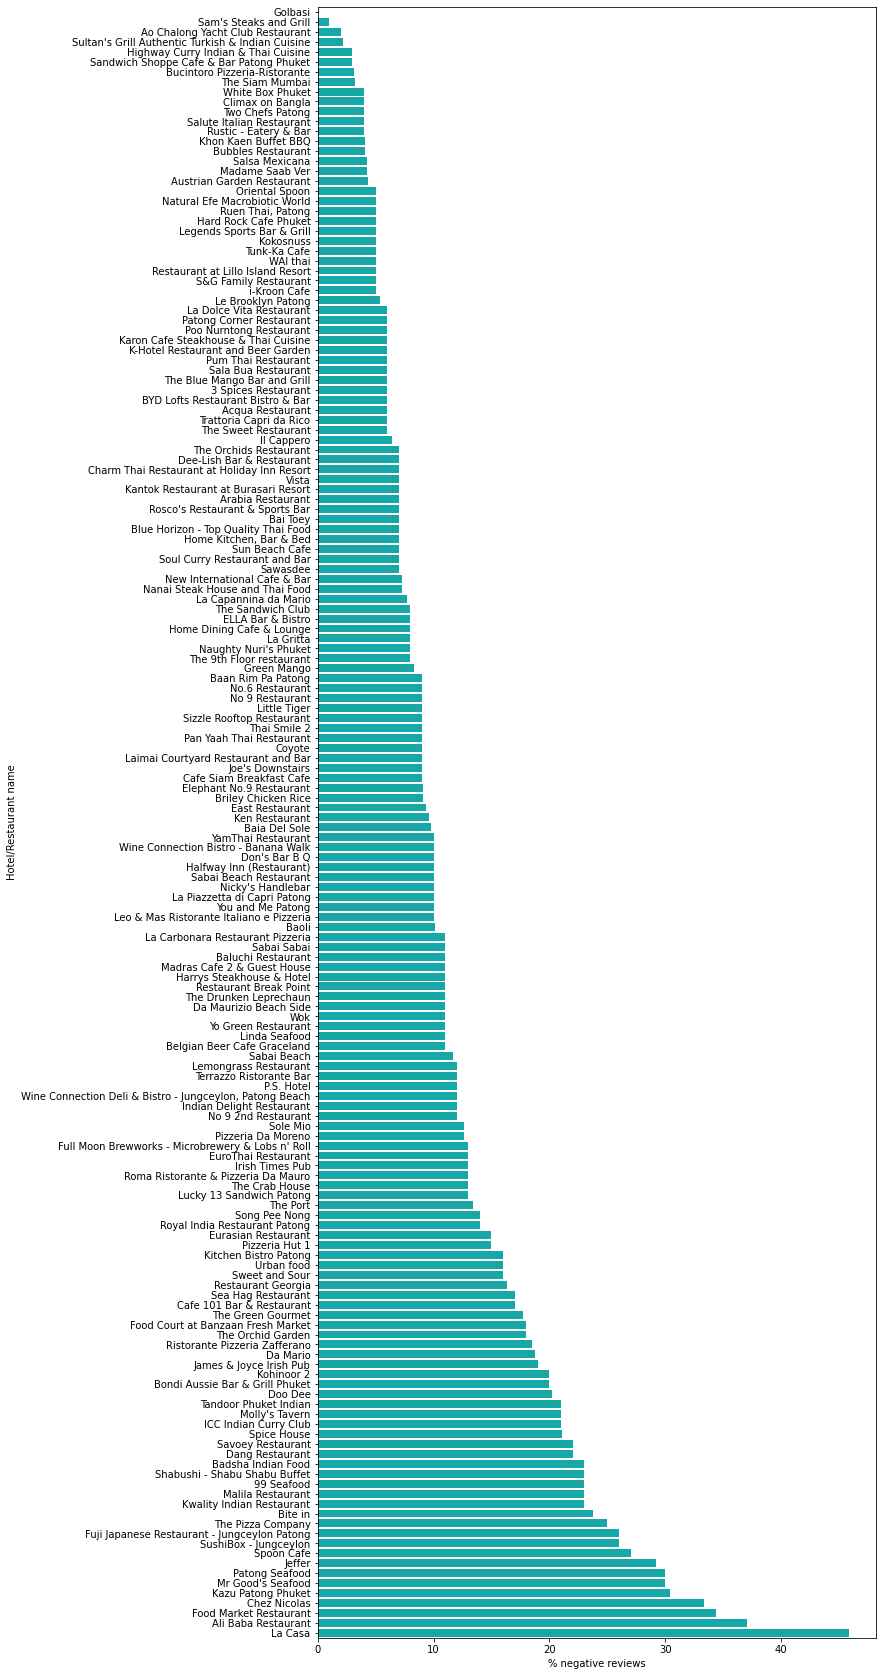

In [32]:
#visualization of the negative reviews for better insight
plt.figure(figsize=(10,30))
sns.barplot(data=percent_negative, x = '% negative reviews',y=percent_negative.index,color='c')

In [33]:
#appying corpus to check stopwords from tokenized text available
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
#Creating a function to apply all of the data preprocessing steps which can then used on a corpus
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)#Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]#Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]#Stemming
  return stemmed_text

In [38]:
#process the text data ready for wordcloud visualization, using the function we defined earlier
#for this part of the exercise we will focus specifically on Sam's Steaks and Grill Hotel, as it has lowest value of negative review

Pat1['processed_review'] = Pat1['Review'].apply(preprocess_text)

reviews_positive_subset = Pat1.loc[(Pat1['Hotel/Restaurant name']=="Sam's Steaks and Grill") 
                                       & (Pat1['compound']>0),:]

reviews_negative_subset = Pat1.loc[(Pat1['Hotel/Restaurant name']=="Sam's Steaks and Grill")
                                      & (Pat1['compound']<=0),:]
reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
0,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,0.8674,0.0,0.0,0.179,"[expens, comparison, local, restaur, that', ap..."
1,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,0.4939,0.0,0.0,0.097,"[walk, pass, holiday, inn, decid, last, minut,..."
2,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",0.9839,0.0,0.0,0.457,"[atmospher, 70', great, comfort, armchair, eff..."
3,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,0.9626,0.0,0.0,0.325,"[made, reserv, last, minut, dine, sam, stay, h..."
4,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,0.9258,0.0,0.0,0.316,"[great, time, celebr, son, birthday, trip, phu..."


In [39]:
reviews_negative_subset['processed_review']

58    [famili, christma, eve, dinner, sam, steak, gr...
Name: processed_review, dtype: object

['famili', 'christma', 'eve', 'dinner', 'sam', 'steak', 'grill', 'last', 'night', 'could', 'prais', 'restaur', 'enough', 'ambianc', 'staff', 'servic', 'food', 'except', 'cannot', 'wait', 'return']


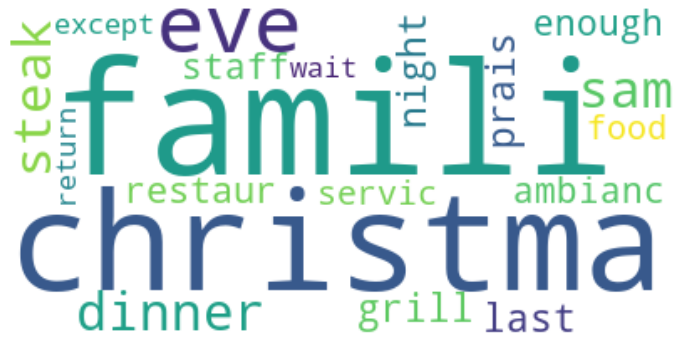

In [40]:
#wordcloud of words from negative reviews by a hotel


neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

print(neg_tokens)
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

['expens', 'comparison', 'local', 'restaur', "that'", 'appl', 'orang', 'type', 'comparison', 'base', 'qualiti', 'food', 'servic', 'great', 'valu', 'realli', 'enbth', 'australian', 'ribey', 'steak', 'extra', 'includ', 'dinnermor', 'walk', 'pass', 'holiday', 'inn', 'decid', 'last', 'minut', 'steak', 'dinner', 'food', 'excel', 'order', 'sirloin', 'price', 'high', '90aud', 'steak', 'think', 'excess', 'also', 'pay', 'atmospher', "70'", 'great', 'comfort', 'armchair', 'effici', 'smile', 'servic', 'meat', 'good', 'origin', 'cook', 'request', 'respect', 'delici', 'b', 'arnais', 'sauc', 'perfect', 'show', 'flamb', 'ed', 'suzett', 'pancak', 'finish', 'excel', 'even', 'return', 'made', 'reserv', 'last', 'minut', 'dine', 'sam', 'stay', 'hotel', 'feel', 'like', 'go', 'everyth', 'amaz', 'servic', 'fabul', 'steak', 'perfectli', 'cook', 'entir', 'meal', 'delici', 'forgot', 'great', 'time', 'celebr', 'son', 'birthday', 'trip', 'phuket', 'servic', 'great', 'would', 'defin', 'come', 'back', 'visit', 'phu

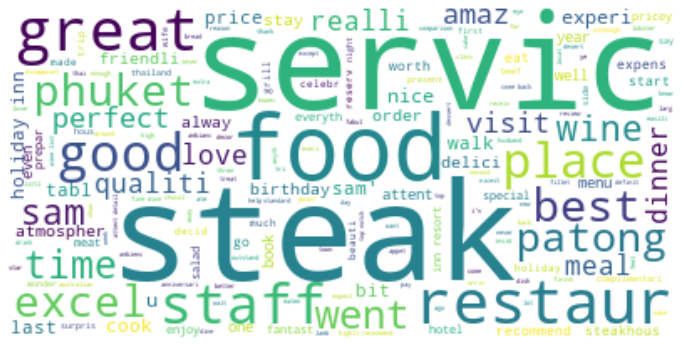

In [41]:
#wordcloud of words from postive reviews by a hotel
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))
print(pos_tokens)
#display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
#using the tabular method to understand the most frequent positive words,and the number of occurrences of each.
#use the nltk Freqdist and then tabulate
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

  steak  servic    food restaur   great   staff    good   place    best   excel 
     51      49      42      37      36      30      26      23      20      19 


In [43]:
#using the tabular method to understand the most frequent negative words,and the number of occurrences of each.
#use the nltk Freqdist and then tabulate
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

  famili christma      eve   dinner      sam    steak    grill     last    night    could 
       1        1        1        1        1        1        1        1        1        1 


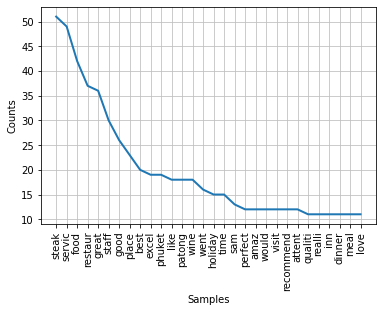

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
#Using plot method to create a frequency distribution plot for the most frequent words in the positive reviews
pos_freqdist.plot(30)

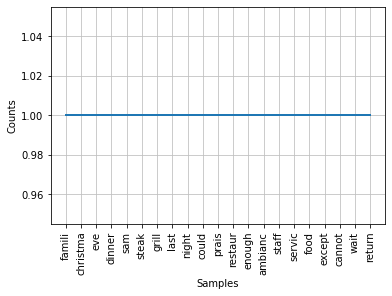

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
#Using plot method to create a frequency distribution plot for the most frequent words in the negative reviews
neg_freqdist.plot(30)